# MULTIPLE  REGRESSION & SUPERVISED CLASSIFICATION METHODS

##1. DATA PREPARATION:  CLEANING & ENRICHMENT

In [1166]:
# imports
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import matplotlib as mpl

# this allows plots to appear directly in the notebook
%matplotlib inline 

demo = pd.io.parsers.read_table('/Users/davidpena/Desktop/PosgradoUB/Proyecto/BBVA/demographic_distribution000', sep='\t', names =['zipcode','date','category','age','gender', 'merchants', 'cards','numpayments', 'avgpayment', 'max', 'min', 'std'])
print demo.shape
demo.head()

(48538, 12)


,zipcode,date,category,age,gender,merchants,cards,numpayments,avgpayment,max,min,std
0,8001,2014-07-01,es_food,unknown,unknown,8,25,26,13.73,31.50,1.50,8.015002
1,8001,2014-07-24,es_transportation,unknown,unknown,12,59,60,16.12,92.00,1.25,17.882527
2,8001,2014-07-09,es_otherservices,unknown,unknown,12,64,64,43.42,275.00,4.10,52.466928
3,8001,2014-07-09,es_food,unknown,unknown,7,28,29,11.72,30.56,0.90,8.120161
4,8001,2014-07-25,es_barsandrestaurants,35-44,male,5,5,5,46.02,165.00,7.10,59.893586


In [1167]:
#First glance to correlations 
#sns.corrplot(demo)

In [1168]:
fashion = demo[demo.category=='es_fashion']
print 'Our data frame now have the following size: ', fashion.shape 
fashion.head()

Our data frame now have the following size:  (12315, 12)


,zipcode,date,category,age,gender,merchants,cards,numpayments,avgpayment,max,min,std
7,8001,2014-07-27,es_fashion,unknown,unknown,5,38,39,24.26,87.31,7.99,15.135713
9,8001,2014-07-24,es_fashion,unknown,unknown,17,160,164,30.51,345.39,2.00,49.655736
20,8002,2014-07-04,es_fashion,35-44,male,5,5,5,44.89,85.00,9.95,27.541576
21,8002,2014-07-08,es_fashion,25-34,female,7,7,8,33.45,89.90,7.99,24.267551
23,8002,2014-07-23,es_fashion,35-44,female,7,7,7,58.46,117.60,13.35,39.195540


In [1169]:
#For our prediction porpouse, we will have to take out 'unknown' raws

fashion = fashion[demo.age!='unknown']
fashion = fashion[demo.gender!='unknown']

print 'Our data frame now have the following size: ', fashion.shape 

fashion.head()


Our data frame now have the following size:  (8549, 12)


,zipcode,date,category,age,gender,merchants,cards,numpayments,avgpayment,max,min,std
20,8002,2014-07-04,es_fashion,35-44,male,5,5,5,44.89,85.00,9.95,27.541576
21,8002,2014-07-08,es_fashion,25-34,female,7,7,8,33.45,89.90,7.99,24.267551
23,8002,2014-07-23,es_fashion,35-44,female,7,7,7,58.46,117.60,13.35,39.195540
24,8002,2014-07-01,es_fashion,25-34,female,12,17,21,30.03,82.95,9.99,19.302063
25,8002,2014-07-05,es_fashion,25-34,male,6,7,9,38.75,99.95,9.99,32.479977


In [1170]:
#We still can take out some useless columns for our purpose
fashion= fashion.reindex(columns=['zipcode','date','age','gender','avgpayment'])

#We will also enrich our data frame with  the days of the week
day=pd.io.parsers.read_table('/Users/davidpena/Desktop/PosgradoUB/Proyecto/DiesSetmana.txt', sep='	', names =['date','day'])
fashion=pd.merge(fashion,day,on='date')
print fashion.day.unique()
fashion.head()

['V' 'M' 'X' 'S' 'J' 'D' 'L']


,zipcode,date,age,gender,avgpayment,day
0,8002,2014-07-04,35-44,male,44.89,V
1,8001,2014-07-04,25-34,male,35.48,V
2,8002,2014-07-04,25-34,male,57.45,V
3,8002,2014-07-04,25-34,male,31.40,V
4,8002,2014-07-04,25-34,female,56.15,V


In [1171]:
#Let's see now the top 10 avgpayment by fashion's category and some other interesting facts. 

top_fashion= fashion.sort(columns='avgpayment', ascending= False)

print 'Top 10 average payment: '

top_fashion.head()


Top 10 average payment: 


,zipcode,date,age,gender,avgpayment,day
1126,8012,2014-07-01,45-54,female,411.40,M
4361,8010,2014-07-31,45-54,female,402.06,J
5699,8911,2014-07-19,45-54,female,387.01,S
6812,8007,2014-07-02,55-64,female,375.16,X
5458,8008,2014-07-19,35-44,female,369.48,S


In [1172]:
print 'min: ', np.min(fashion['avgpayment'])
print 'mean:', np.mean(fashion['avgpayment'])
print 'median:',np.median(fashion['avgpayment'])
print 'max:', np.max(fashion['avgpayment'])

min:  8.13
mean: 41.9882793309
median: 37.09
max: 411.4


In [1173]:
#Transforming categorical variables into "numerical" variables

dic= {'female':0, 'male':1}

dict2= {'<25':1, '25-34':2,'35-44':3, '45-54':4,'55-64':5, '>=65':6}

dict3= {'L':1, 'M':2, 'X':3, 'V':4, 'J':5, 'S':6, 'D':7}

In [1174]:
fashion['gender'] = fashion.gender.map(dic)

fashion['age'] = fashion.age.map(dict2)

fashion['day'] = fashion.day.map(dict3)

fashion.head(5)


,zipcode,date,age,gender,avgpayment,day
0,8002,2014-07-04,3,1,44.89,4
1,8001,2014-07-04,2,1,35.48,4
2,8002,2014-07-04,2,1,57.45,4
3,8002,2014-07-04,2,1,31.40,4
4,8002,2014-07-04,2,0,56.15,4


In [1175]:
#### fashion.to_csv("fashion", sep='\t',decimal='.', index=True)

## 2. REGRESSION MODELS

### 2.1 DECISIONTREE REGRESSION

In [1176]:
#Now we will create our feature matrix and our "y" target.

data= fashion.reindex(columns=['zipcode','gender','age','day']) #feature matrix
fashion.target= fashion.reindex(columns=['avgpayment']) #y

In [1177]:
X,y = data, fashion.target
print X.shape, y.shape

(8549, 4) (8549, 1)


In [1178]:
#Fit regression model

clf_1 = DecisionTreeRegressor(max_depth=10)
clf_2 = DecisionTreeRegressor(max_depth=21)
clf_1.fit(X, np.ravel(y))
clf_2.fit(X, np.ravel(y))


DecisionTreeRegressor(compute_importances=None, criterion='mse', max_depth=21,
           max_features=None, max_leaf_nodes=None, min_density=None,
           min_samples_leaf=1, min_samples_split=2, random_state=None,
           splitter='best')

In [1179]:
print np.max(fashion.target), np.min(fashion.target), np.mean(fashion.target)

avgpayment    411.4
dtype: float64 avgpayment    8.13
dtype: float64 avgpayment    41.988279
dtype: float64


In [1180]:
print clf_1.score(data, fashion.target) 
print clf_2.score(data, fashion.target) 

0.29490115927
0.36732869937


In [1181]:
print 'Write your destination zipcode in here: ' 
z= input()

print 'If you are Female press 0, if not press 1, otherwise choose whatever you want:' 
g= input()

print 'Select your age interval, where...' 
print '1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 ' 
a= input()

print 'Select the day of the week you want to go shopping (from 1 to 7), where 1= Monday to 7= sunday' 
d= input()



Write your destination zipcode in here: 
8030
If you are Female press 0, if not press 1, otherwise choose whatever you want:
1
Select your age interval, where...
1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 
1
Select the day of the week you want to go shopping (from 1 to 7), where 1= Monday to 7= sunday
5


In [1182]:
result= [z,g,a,d]
print result

[8030, 1, 1, 5]


In [1183]:
# Predict
print clf_1.predict(result)
print clf_2.predict(result)

[ 44.66652174]
[ 40.39]


In [1184]:
print clf_1.predict([8008,1,2,1]) 
print clf_2.predict([8008,1,2,7]) 

[ 156.29]
[ 85.17]


In [1185]:
# Predicting all our df trained 

X_test = data

y_1 = clf_1.predict(X_test)

y_2 = clf_2.predict(X_test)

print y_1

print y_2


[ 46.64538462  43.35621212  43.35621212 ...,  41.66110778  41.66110778
  41.66110778]
[ 46.64538462  35.48        39.85285714 ...,  46.65428571  46.0056      46.0056    ]


In [1187]:
#Scores

from sklearn import metrics

y_pred=clf_1.predict(X)
y_pred2=clf_2.predict(X)

print "Coefficient of determination clf_1:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n"
print "Coefficient of determination clf_2:{0:.3f}".format(metrics.r2_score(y,y_pred2)),"\n"

Coefficient of determination clf_1:0.295 

Coefficient of determination clf_2:0.367 



### 2.2 RANDOM FOREST REGRESSION

In [1188]:
from sklearn.ensemble.forest import RandomForestRegressor

#Fitting our RANDOM FOREST REGRESSION

rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=15)

rf.fit(X, np.ravel(y))



RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=15, n_jobs=1, oob_score=False,
           random_state=None, verbose=0)

In [1189]:
print round(rf.score(data, fashion.target) ,4)

0.3418


In [1191]:
print 'Write your destination zipcode in here: '  
z= input()

print 'If you are Female press 0, if not press 1, otherwise choose whatever you want:' 
g= input()

print 'Select your age interval, where...' 
print '1: <25:, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 '
a= input()

print 'Select the day of the week you want to go shopping (from 1 to 7)' 
d= input()

result= [z,g,a,d]

print '\t'

print 'Your avgpayment is:', round(rf.predict(result),2)

Write your destination zipcode in here: 
8028
If you are Female press 0, if not press 1, otherwise choose whatever you want:
1
Select your age interval, where...
1: <25:, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 
1
Select the day of the week you want to go shopping (from 1 to 7)
2
	
Your avgpayment is: 39.74


In [1192]:
print 'Custom data Example with both methods:' 

print round(clf_2.predict([17032,1,1,3]),2), 'Best DecisionTree' 

print round(rf.predict([17032,1,1,3]),2), 'Best RandomForest'



Custom data Example with both methods:
36.02 Best DecisionTree
41.89 Best RandomForest


###2.3 CROSS VALIDATION DECISIONTREE/RANDOMFOREST REGRESSORS

In [1193]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle

print 'DECISIONTREE REGRESSION:'

print '\t'

X,y = data, np.ravel(fashion.target)
print 'Feature Matrix (X):', X.shape,'//', 'Target (Y):',y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=33)

print '\t'

print 'TRAIN SHAPE-->', 'X:', X_train.shape,'//', 'Y:', y_train.shape #(modelo lineal con 4 variables)
print 'TEST SHAPE-->', 'X:',X_test.shape,'//','Y:', y_test.shape

DECISIONTREE REGRESSION:
	
Feature Matrix (X): (8549, 4) // Target (Y): (8549,)
	
TRAIN SHAPE--> X: (2564, 4) // Y: (2564,)
TEST SHAPE--> X: (5985, 4) // Y: (5985,)


In [1194]:
DT = clf_1

DT.fit(X_train, y_train)

# Best possible score is 1.0, lower values are worse.

print 'DECISION TREE REGRESSION:'
print '\t'

print 'Test Score:', round(DT.score(X_test, y_test),4)
print 'Train Score:', round(DT.score(X_train, y_train),4) 

print '\t'
print 'Training MSE: ', round(np.mean((DT.predict(X_train) - y_train)**2),2)
print 'Test MSE: ', round(np.mean((DT.predict(X_test) - y_test)**2),2)

print '\t'

print 'RANDOM FOREST REGRESSION:'
print '\t'
print 'Test Score:', round(rf.score(X_test, y_test),4)
print 'Train Score:', round(rf.score(X_train, y_train),4)
print '\t'                          
print 'Training MSE: ', round(np.mean((rf.predict(X_train) - y_train)**2),2)
print 'Test MSE: ', round(np.mean((rf.predict(X_test) - y_test)**2),2)

DECISION TREE REGRESSION:
	
Test Score: -0.1797
Train Score: 0.4934
	
Training MSE:  268.24
Test MSE:  574.05
	
RANDOM FOREST REGRESSION:
	
Test Score: 0.3191
Train Score: 0.3896
	
Training MSE:  323.25
Test MSE:  331.32


##3. CLASSIFICATION METHODS

### 3.1 DECISION TREE CLASSIFIER

In [1195]:
#Reset workspace*
%reset -f

In [1196]:
# imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import kde
from scipy import stats

# this allows plots to appear directly in the notebook
%matplotlib inline 

In [1197]:
fashion= pd.io.parsers.read_table('fashion',sep='\t', index_col=0)
print fashion.shape
fashion.head()

(8549, 6)


,zipcode,date,age,gender,avgpayment,day
0,8002,2014-07-04,3,1,44.89,4
1,8001,2014-07-04,2,1,35.48,4
2,8002,2014-07-04,2,1,57.45,4
3,8002,2014-07-04,2,1,31.40,4
4,8002,2014-07-04,2,0,56.15,4


In [1198]:
#feature matrix & target

data= fashion.reindex(columns=['zipcode','gender','age','day']) #feature matrix
fashion_target= fashion.reindex(columns=['avgpayment']) #y

In [1199]:
print 'min: ', np.min(fashion['avgpayment'])
print 'mean:', np.mean(fashion['avgpayment'])
print 'median:',np.median(fashion['avgpayment'])
print 'max:', np.max(fashion['avgpayment'])

min:  8.13
mean: 41.9882793309
median: 37.09
max: 411.4


In [1200]:
#we will sort all the avgpayment values before creating a range class

l= fashion_target.sort(['avgpayment'], ascending= True)

l=l.reset_index(drop=True)

l.head()


,avgpayment
0,8.13
1,10.39
2,11.02
3,11.04
4,11.05


In [1201]:
low = l[(l['avgpayment']<=31)]
medium = l[(l['avgpayment']>31) & (l['avgpayment']<=45)]
high = l[(l['avgpayment']>45)]

print 'Low:', low.size
print 'Medium:', medium.size
print 'High:', high.size


print 'Total:', data.shape

coeflow= float(len(low)) / float(len(fashion))

coefmedium= float(len(medium)) / float(len(fashion))

coefhigh= float(len(high)) / float(len(fashion))




print '\t'

print 'Low coef:', round (coeflow,4)
print 'Medium coef:', round (coefmedium,4)
print 'High coef: ', round(coefhigh,4)




Low: 2664
Medium: 3207
High: 2678
Total: (8549, 4)
	
Low coef: 0.3116
Medium coef: 0.3751
High coef:  0.3133


In [1202]:
#Transform output into class

#l.to_csv("fashion_class", sep=';',decimal='.', index=True)

fashion_class= pd.io.parsers.read_table('fashion_class.txt',sep=';', index_col=0)

fashion_class= fashion_class.drop('avgpayment', 1) #Drop numeric column

fashion_class.head()


,class
0,Low - [up to 31 eur]
1,Low - [up to 31 eur]
2,Low - [up to 31 eur]
3,Low - [up to 31 eur]
4,Low - [up to 31 eur]


In [1203]:
data.head()

,zipcode,gender,age,day
0,8002,1,3,4
1,8001,1,2,4
2,8002,1,2,4
3,8002,1,2,4
4,8002,0,2,4


In [1204]:
from IPython.html.widgets import interact
from sklearn import metrics

#fitting
from sklearn import tree

X = data
y = fashion_class
clf = tree.DecisionTreeClassifier()
clf_dt = clf.fit(X, y)


In [1205]:
print 'Write your destination zipcode in here: ' 
z= input()

print 'If you are Female press 0, if not press 1, otherwise choose whatever you want:' 
g= input()

print 'Select your age interval, where...' 
print '1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 ' 
a= input()

print 'Select the day of the week you want to go shopping (from 1 to 7)' 
d= input()


Write your destination zipcode in here: 
8002
If you are Female press 0, if not press 1, otherwise choose whatever you want:
1
Select your age interval, where...
1: <25, 2: 25-34 , 3: 35-44 , 4: 45-54, 5: 55-64 , 6: >=65 
1
Select the day of the week you want to go shopping (from 1 to 7)
3


In [1206]:
# Predict 
result= [z,g,a,d]

you= clf_dt.predict(result) 

against= clf_dt.predict([8018,1,1,5]) #TOP!: 8018, male ,under 21, viernes

print 'Your average payment is:', you

print 'The profile compared to you has an average payment:', against


Your average payment is: ['High - [ more than 46 eur ]']
The profile compared to you has an average payment: ['Medium - [31 to 45 eur]']


In [1207]:
score1= clf_dt.score(data,fashion_class)

print round(score1,4), '--> DECISIONTREE SCORE'

0.6663 --> DECISIONTREE SCORE


In [1208]:
#Export Tree
import os
dotfile = tree.export_graphviz(clf_dt, out_file = "fashiontree.dot")

os.system("dot -Tpng fashiontree.dot -o fashiontree.png")

32512

In [1209]:
from IPython.core.display import Image
Image("fashiontree.png")

#### Before considering any cross valitaion,  we will create another predictor based on Random Forest algorithm and we will compare them

### 3.2 RANDOM FOREST CLASSIFIER

In [1210]:
from sklearn.ensemble.forest import RandomForestClassifier

#Fitting our RANDOM FOREST REGRESSION

clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=20)

clf_rf.fit(X, np.ravel(y))



RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [1211]:
# Predict
result= [z,g,a,d]

you= clf_rf .predict(result) 

against= clf_rf .predict([8031,1,1,5]) #TOP!: 8018, male ,under 21, viernes

print 'Your average payment is:', you

print 'The profile compared to you has an average payment:', against

Your average payment is: ['High - [ more than 46 eur ]']
The profile compared to you has an average payment: ['Medium - [31 to 45 eur]']


In [1212]:
score2= clf_rf.score(data,fashion_class)

print round(score2,4), '--> RANDOM FOREST SCORE'
print round(score1,4), '--> DECISIONTREE SCORE'

0.6648 --> RANDOM FOREST SCORE
0.6663 --> DECISIONTREE SCORE


### 3.3 CROSS VALIDATION DECISIONTREE & RANDOM FOREST

In [1213]:
#Reset workspace*
%reset -f

import numpy as np
import pandas as pd 
from sklearn.tree import *

#Recover Fashion data

fashion= pd.io.parsers.read_table('fashion',sep='\t', index_col=0)

fashion_class= pd.io.parsers.read_table('fashion_class.txt',sep=';', index_col=0)

fashion_class= fashion_class.drop('avgpayment', 1) #Drop numeric column

fashion_class.head()


,class
0,Low - [up to 31 eur]
1,Low - [up to 31 eur]
2,Low - [up to 31 eur]
3,Low - [up to 31 eur]
4,Low - [up to 31 eur]


In [1214]:
#feature matrix & target

data= fashion.reindex(columns=['zipcode','gender','age','day']) #feature matrix

data.head()

,zipcode,gender,age,day
0,8002,1,3,4
1,8001,1,2,4
2,8002,1,2,4
3,8002,1,2,4
4,8002,0,2,4


In [1215]:
#We are gonna split Train & Tests
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, fashion_class, test_size=0.7, random_state=13)

In [1216]:
from sklearn.ensemble.forest import RandomForestClassifier
from IPython.html.widgets import interact
from sklearn import tree
from sklearn import metrics

#We are gonna split Train & Tests
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, fashion_class, test_size=0.7, random_state=13)



In [1217]:
X,y = data, np.ravel(fashion_class)
print 'Feature Matrix (X):', X.shape,'//', 'Target (Y):',y.shape

print '\t'

print 'TRAIN SHAPE-->', 'X:', X_train.shape,'//', 'Y:', y_train.shape #(modelo lineal con 4 variables)
print 'TEST SHAPE-->', 'X:',X_test.shape,'//','Y:', y_test.shape

print '\t'

print 'DECISIONTREE VS RANDOM FOREST CLASSIFIER (FASHION CATEGORY):'

print '\t'

#Fitting our DECISION TREE & RANDOM FOREST CLASSIFIERS WITH TRAINING DATA


clf_dt = tree.DecisionTreeClassifier(max_depth=6)
clf_dt = clf_dt.fit(X_train, np.ravel(y_train)) 

clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=19)

clf_rf.fit(X_train, np.ravel(y_train))  

# Best possible score is 1.0, lower values are worse.

#dt
print 'DecisionTree - Train Score:', clf_dt.score(X_train, y_train)
print 'DecisionTree - Test Score:', clf_dt.score(X_test, y_test)

print '\t'

#rf
print 'RandomForest - Train Score:', clf_rf.score(X_train, y_train) 
print 'RandomForest - Test Score:', clf_rf.score(X_test, y_test) 


Feature Matrix (X): (8549, 4) // Target (Y): (8549,)
	
TRAIN SHAPE--> X: (2564, 4) // Y: (2564, 1)
TEST SHAPE--> X: (5985, 4) // Y: (5985, 1)
	
DECISIONTREE VS RANDOM FOREST CLASSIFIER (FASHION CATEGORY):
	
DecisionTree - Train Score: 0.627535101404
DecisionTree - Test Score: 0.622723475355
	
RandomForest - Train Score: 0.719968798752
RandomForest - Test Score: 0.5440267335


In [1218]:
from sklearn.cross_validation import * #validation strategy
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print "Coefficient of determination on training set:",clf.score(X_train, y_train)
    
    # create a k-fold cross-validation iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv) #(...,cv=cv) ponmelo en orden de cv
    
    print "Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores)


In [1219]:

train_and_evaluate(clf_dt,X_train,np.ravel(y_train))

'''clf_dt = tree.DecisionTreeClassifier(max_depth=6)'''


Coefficient of determination on training set: 0.627535101404
Average coefficient of determination using 5-fold crossvalidation: 0.610378594055


'clf_dt = tree.DecisionTreeClassifier(max_depth=6)'

In [1220]:
train_and_evaluate(clf_rf,X_train,np.ravel(y_train))



'''clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2,n_estimators=19)'''


Coefficient of determination on training set: 0.717238689548
Average coefficient of determination using 5-fold crossvalidation: 0.526125426413


"clf_rf = RandomForestClassifier(bootstrap=True, max_depth=None,\n           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,\n           min_samples_split=2,n_estimators=19)"

In [1221]:
def measure_performance(X,y,clf_rf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf_rf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"

    if show_classification_report: #excepto cofficient of determination el resto son para clasificadores
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
        
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"
        
    if show_r2_score:
        print "Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n"

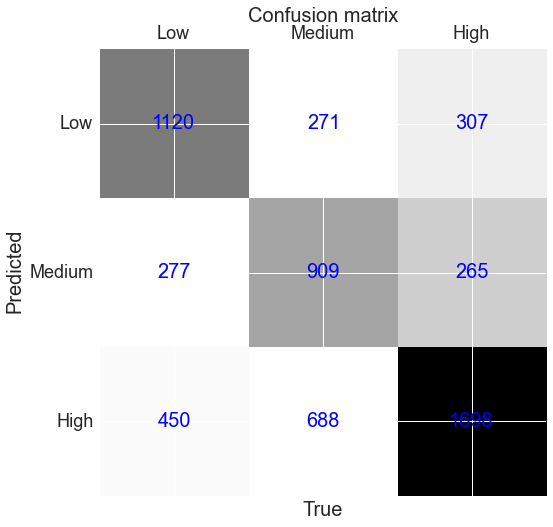

Evaluation decison tree test set:  
	
Accuracy:0.623 

Classification report
             precision    recall  f1-score   support

High - [ more than 46 eur ]       0.66      0.61      0.63      1847
Low - [up to 31 eur]       0.63      0.49      0.55      1868
Medium - [31 to 45 eur]       0.60      0.75      0.67      2270

avg / total       0.63      0.62      0.62      5985




In [1222]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

y_pred= clf_dt.predict(X_test)

def draw_confusion(y_test,y_pred,labels):
    cm = metrics.confusion_matrix(y_test,  y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=18)
    ax.set_yticklabels([''] + labels, size=18)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in xrange(3):
        for j in xrange(3):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='blue',size=20)
    fig.set_size_inches(8,8)
    plt.show()

draw_confusion(y_test, y_pred,['Low', 'Medium','High', 'Top'])

print 'Evaluation decison tree test set:  '   
print '\t'

measure_performance(X_test,y_test,clf_dt, show_accuracy=True, \
                    show_classification_report=True,show_confusion_matrix=False, show_r2_score=False)

The matrix is divided in four quarters and contains

+ True Positives (TP): Positive samples predicted as such.
+ True Negatives (TN): Negative samples predicted as such.
+ False Positives (FP): Negative samples predicted as positive.
+ False Negatives (FN): Positive samples predicted as negative.

The combination of these elements allows to define several performance metrics:

+ Accuracy: 

$$\text{accuracy}=\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

Column-wise we find these two partial performance metrics:

+ Sensitivity or Recall: 

$$\text{sensitivity}=\frac{\text{TP}}{\text{Real Positives}}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$

+ Specificity:

$$\text{specificity}=\frac{\text{TN}}{\text{Real Negatives}}=\frac{\text{TN}}{\text{TN}+\text{FP}}$$

Row-wise we find these two partial performance metrics:

+ Precision or Positive Predictive Value:

$$\text{precision}=\frac{\text{TP}}{\text{Predicted Positives}}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$

+ Negative predictive value:

$$\text{NPV}=\frac{\text{TN}}{\text{Predicted Negative}}=\frac{\text{TN}}{\text{TN}+\text{FN}}$$

The concept of positive and negative samples is purely arbitrary, thus we really have to remember the concepts of precision/positive predictive value and sensitivity/recall. 

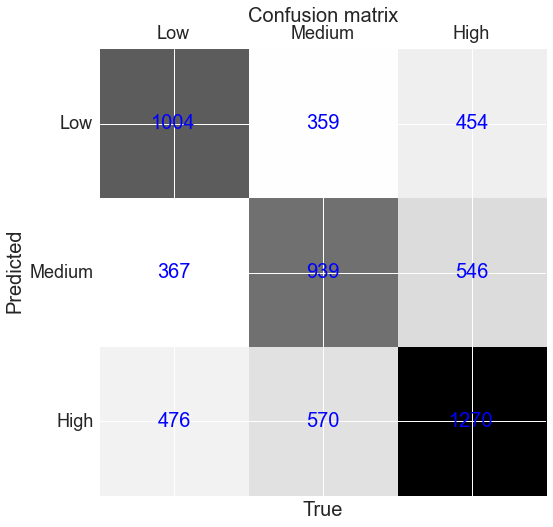

Evaluation random forest test set:  
	
Accuracy:0.537 

Classification report
             precision    recall  f1-score   support

High - [ more than 46 eur ]       0.55      0.54      0.55      1847
Low - [up to 31 eur]       0.51      0.50      0.50      1868
Medium - [31 to 45 eur]       0.55      0.56      0.55      2270

avg / total       0.54      0.54      0.54      5985




In [1223]:
y_pred= clf_rf.predict(X_test)

draw_confusion(y_test, y_pred,['Low', 'Medium','High'])

print 'Evaluation random forest test set:  '   
print '\t'
       
measure_performance(X_test,y_test,clf_rf, show_accuracy=True, \
                    show_classification_report=True,show_confusion_matrix=False, show_r2_score=False)


In [1224]:
'''#FEATURE SELECTION

feature_names= data[['zipcode','gender','age','day']]

from sklearn.feature_selection import *

fs=SelectKBest(score_func=f_regression,k=3)

X_new=fs.fit_transform(X_train,y_train)

print 'Original train shape:', X_train.shape

print 'New train shape:', X_new.shape'''


"#FEATURE SELECTION\n\nfeature_names= data[['zipcode','gender','age','day']]\n\nfrom sklearn.feature_selection import *\n\nfs=SelectKBest(score_func=f_regression,k=3)\n\nX_new=fs.fit_transform(X_train,y_train)\n\nprint 'Original train shape:', X_train.shape\n\nprint 'New train shape:', X_new.shape"

##4. CONCLUSIONS